In [ ]:
#Import all libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load in data from excel/csv
data = pd.read_csv(r'/content/Telco_Churn_Dataset.csv')

In [ ]:
#Ensure the object has the correct data
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Determine the number of columns and rows within dataset
data.shape

(7043, 21)

In [ ]:
data.index

RangeIndex(start=0, stop=7043, step=1)

In [ ]:
#List the column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Determine the types of data
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Check data for any missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#No missing values
data1=data.copy()

In [ ]:
X = data1.iloc[ : , :-1].values

In [ ]:
X

array([['7590-VHVEG', 'Female', 0, ..., 'Electronic check', 29.85,
        '29.85'],
       ['5575-GNVDE', 'Male', 0, ..., 'Mailed check', 56.95, '1889.5'],
       ['3668-QPYBK', 'Male', 0, ..., 'Mailed check', 53.85, '108.15'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 'Electronic check', 29.6,
        '346.45'],
       ['8361-LTMKD', 'Male', 1, ..., 'Mailed check', 74.4, '306.6'],
       ['3186-AJIEK', 'Male', 0, ..., 'Bank transfer (automatic)',
        105.65, '6844.5']], dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X[ : ,0] = label_encoder.fit_transform(X[ :, 0])

In [ ]:
X

array([[5375, 'Female', 0, ..., 'Electronic check', 29.85, '29.85'],
       [3962, 'Male', 0, ..., 'Mailed check', 56.95, '1889.5'],
       [2564, 'Male', 0, ..., 'Mailed check', 53.85, '108.15'],
       ...,
       [3367, 'Female', 0, ..., 'Electronic check', 29.6, '346.45'],
       [5934, 'Male', 1, ..., 'Mailed check', 74.4, '306.6'],
       [2226, 'Male', 0, ..., 'Bank transfer (automatic)', 105.65,
        '6844.5']], dtype=object)

In [ ]:
#Replace every 'Yes' in data with a '1' and every 'No' with a '0'
data1.Partner.replace(('Yes', 'No'), (1,0), inplace=True)
data1.Dependents.replace(('Yes', 'No'), (1,0), inplace=True)
data1.PhoneService.replace(('Yes', 'No'), (1, 0), inplace=True)
data1.MultipleLines.replace(('Yes', 'No phone service', 'No'), (1,0,0), inplace=True)
data1.OnlineSecurity.replace(('Yes', 'No', 'No internet service'), (1, 0,0), inplace = True)
data1.OnlineBackup.replace(('Yes', 'No'), (1,0), inplace=True)
data1.DeviceProtection.replace(('Yes', 'No', 'No internet service'), (1,0,0), inplace=True)
data1.TechSupport.replace(('Yes', 'No', 'No internet service'), (1,0,0), inplace=True)
data1.StreamingTV.replace(('Yes', 'No', 'No internet service'), (1,0,0), inplace=True)
data1.StreamingMovies.replace(('Yes', 'No', 'No internet service'), (1,0,0), inplace = True)
data1.PaperlessBilling.replace(('Yes', 'No'), (1,0), inplace=True)
data1.Churn.replace(('Yes', 'No'), (1,0), inplace = True)

In [ ]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [ ]:
# Split all Categorical Columns into Multiples
data2=data1.drop(['gender'],axis=1)

In [ ]:
#Make a new column showing Female_Gender and Male_Gender
#Remove Original "Gender" column
dummy=pd.get_dummies(data1['gender'],prefix="Gender")
dummy
data2=pd.concat([data2,dummy], axis=1)

In [ ]:
#Make a new column showing the different internet services as columns starting with "InternetService"
#Remove original column named "InternetService"
data3=data2.drop(['InternetService'],axis=1)
dummy=pd.get_dummies(data2["InternetService"],prefix="InternetService")
dummy
data3=pd.concat([data3,dummy],axis=1)

In [ ]:
#Make a new column showing different contract types starting with "Contract"
#Remove original column named "Contract"
data4=data3.drop(['Contract'],axis=1)
dummy=pd.get_dummies(data3["Contract"],prefix="Contract")
dummy
data4=pd.concat([data4, dummy],axis=1)

In [ ]:
#Do the same thing with "PaymentMethod" as we did for "Gender", "InternetServices", and "Contracts"
data5=data4.drop(['PaymentMethod'],axis=1)
dummy=pd.get_dummies(data4["PaymentMethod"],prefix="PaymentMethod")
dummy
data5=pd.concat([data5,dummy],axis=1)
data5

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
#create dummies for the following columns:
data5=pd.get_dummies(data5,columns=['MultipleLines'])
data5=pd.get_dummies(data5,columns=['OnlineSecurity'])
data5=pd.get_dummies(data5,columns=['OnlineBackup'])
data5=pd.get_dummies(data5,columns=['DeviceProtection'])

data5

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
0,7590-VHVEG,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,9237-HQITU,0,0,0,2,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,1,1,...,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,0,1,1,1,...,0,0,1,1,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,11,0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0


In [ ]:
#remove the column labeled "customerID"
data6=data5.drop(['customerID'], axis =1)
data6

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
0,0,1,0,1,0,0,0,0,1,29.85,...,0,1,0,1,0,0,1,0,1,0
1,0,0,0,34,1,0,0,0,0,56.95,...,1,1,0,0,1,1,0,0,0,1
2,0,0,0,2,1,0,0,0,1,53.85,...,1,1,0,0,1,0,1,0,1,0
3,0,0,0,45,0,1,0,0,0,42.30,...,0,1,0,0,1,1,0,0,0,1
4,0,0,0,2,1,0,0,0,1,70.70,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,1,84.80,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,72,1,0,1,1,1,103.20,...,0,0,1,1,0,0,1,0,0,1
7040,0,1,1,11,0,0,0,0,1,29.60,...,0,1,0,0,1,1,0,0,1,0
7041,1,1,0,4,1,0,0,0,1,74.40,...,1,0,1,1,0,1,0,0,1,0


In [ ]:
#list columns to ensure CustomerID is off of the dataset
data6.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Gender_Female',
       'Gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_0', 'MultipleLines_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_No internet service', 'DeviceProtection_0',
       'DeviceProtection_1'],
      dtype='object')

In [ ]:
#change "MonthlyCharges" to an integer type
data6['MonthlyCharges'] = data6.MonthlyCharges.astype(int)

In [ ]:
#change "TotalCharges" to an integer type
data6['TotalCharges'] = data6.MonthlyCharges.astype(int)

In [ ]:
#list all datatypes within data6 dataset
data6.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
Gender_Female                              uint8
Gender_Male                                uint8
InternetService_DSL                        uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_Month-to-month                    uint8
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Bank t

In [ ]:
#split data
#identify x as all columns except Churn
x = data6.loc[:,['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_0', 'MultipleLines_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_No internet service', 'DeviceProtection_0',
       'DeviceProtection_1']]
#identify y as "Churn" columns
y = data6.loc[:, ["Churn"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
#show X_train
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
2920,0,1,0,72,1,1,1,1,0,85,...,1,1,0,0,1,0,1,0,0,1
2966,1,0,0,14,0,0,1,1,1,46,...,0,1,0,1,0,1,0,0,1,0
6099,0,1,1,71,1,0,0,0,0,24,...,0,0,1,1,0,0,0,1,1,0
5482,0,1,1,33,1,1,1,1,1,73,...,1,1,0,1,0,1,0,0,0,1
2012,0,1,0,47,1,0,1,0,1,98,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,1,0,15,1,1,1,1,1,103,...,0,0,1,1,0,1,0,0,0,1
3264,0,0,1,10,1,1,1,0,1,91,...,0,1,0,1,0,1,0,0,0,1
1653,0,1,0,58,1,0,0,0,0,20,...,1,1,0,1,0,0,0,1,1,0
2607,1,0,0,1,1,0,0,0,1,69,...,0,1,0,1,0,1,0,0,1,0


In [ ]:
#Show X_test
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
2200,0,0,0,19,1,0,1,0,0,58,...,0,1,0,1,0,0,1,0,1,0
4627,0,0,0,60,1,1,1,1,1,116,...,0,0,1,0,1,0,1,0,0,1
3225,0,0,0,13,1,0,1,1,1,71,...,0,1,0,0,1,1,0,0,1,0
2828,0,0,0,1,1,0,0,0,0,20,...,1,1,0,1,0,0,0,1,1,0
3768,0,1,0,55,1,0,0,0,1,77,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1,1,0,7,1,0,1,1,1,99,...,0,0,1,1,0,1,0,0,0,1
5333,0,1,1,13,1,0,1,1,0,88,...,0,1,0,1,0,1,0,0,1,0
6972,1,0,0,56,1,1,1,1,1,111,...,0,0,1,1,0,0,1,0,0,1
4598,0,0,0,18,1,0,0,0,0,56,...,1,0,1,0,1,1,0,0,1,0


In [ ]:
#Show y_train
y_train

,Churn
2920,0
2966,0
6099,0
5482,1
2012,1
...,...
4931,0
3264,0
1653,0
2607,1


In [ ]:
#Show y_test
y_test

,Churn
2200,0
4627,0
3225,0
2828,0
3768,0
...,...
2631,1
5333,1
6972,1
4598,0


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_X=StandardScaler()

In [ ]:
#transform the data for X_train to be reidentified
X_train = standard_X.fit_transform(X_train)

In [ ]:
#transform data for X_test to be reidentified 
X_test = standard_X.fit_transform(X_test)

In [ ]:
#print X_train
X_train

array([[-0.4397627 ,  1.03247596, -0.65321536, ..., -0.52628119,
        -1.37989989,  1.37989989],
       [ 2.27395367, -0.96854556, -0.65321536, ..., -0.52628119,
         0.72469025, -0.72469025],
       [-0.4397627 ,  1.03247596,  1.53088869, ...,  1.9001249 ,
         0.72469025, -0.72469025],
       ...,
       [-0.4397627 ,  1.03247596, -0.65321536, ...,  1.9001249 ,
         0.72469025, -0.72469025],
       [ 2.27395367, -0.96854556, -0.65321536, ..., -0.52628119,
         0.72469025, -0.72469025],
       [-0.4397627 , -0.96854556,  1.53088869, ...,  1.9001249 ,
         0.72469025, -0.72469025]])

In [ ]:
#print X_test
X_test

array([[-0.44053127, -0.95896743, -0.65719903, ..., -0.52451227,
         0.72108034, -0.72108034],
       [-0.44053127, -0.95896743, -0.65719903, ..., -0.52451227,
        -1.38680803,  1.38680803],
       [-0.44053127, -0.95896743, -0.65719903, ..., -0.52451227,
         0.72108034, -0.72108034],
       ...,
       [ 2.26998644, -0.95896743, -0.65719903, ..., -0.52451227,
        -1.38680803,  1.38680803],
       [-0.44053127, -0.95896743, -0.65719903, ..., -0.52451227,
         0.72108034, -0.72108034],
       [-0.44053127, -0.95896743, -0.65719903, ..., -0.52451227,
         0.72108034, -0.72108034]])

In [ ]:
#print y_train for viewing
y_train

,Churn
2920,0
2966,0
6099,0
5482,1
2012,1
...,...
4931,0
3264,0
1653,0
2607,1


In [ ]:
#print y_test 
y_test

,Churn
2200,0
4627,0
3225,0
2828,0
3768,0
...,...
2631,1
5333,1
6972,1
4598,0


In [ ]:
# Calculating Descriptive Statistics 
data6.describe(include='all')

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.290217,0.384353,0.387903,0.592219,64.295897,...,0.228880,0.578163,0.421837,0.713332,0.286668,0.438450,0.344881,0.216669,0.656112,0.343888
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.453895,0.486477,0.487307,0.491457,30.092727,...,0.420141,0.493888,0.493888,0.452237,0.452237,0.496232,0.475363,0.412004,0.475038,0.475038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,70.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#find the correlation for all columns
data6.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.060625,0.105378,0.120176,0.156530,0.220129,...,-0.153477,-0.142948,0.142948,0.038653,-0.038653,0.087952,0.066572,-0.182742,-0.059428,0.059428
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.119999,0.124666,0.117412,-0.014877,0.096913,...,-0.095125,-0.142057,0.142057,-0.143106,0.143106,-0.136058,0.141498,0.000615,-0.153786,0.153786
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.063268,-0.016558,-0.039741,-0.111377,-0.113910,...,0.059071,0.024526,-0.024526,-0.080972,0.080972,-0.138756,0.023671,0.139812,-0.013963,0.013963
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.324221,0.279756,0.286111,0.006152,0.247917,...,-0.233852,-0.331941,0.331941,-0.327203,0.327203,-0.312694,0.360277,-0.039062,-0.360653,0.360653
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.096340,-0.022574,-0.032959,0.016505,0.247277,...,-0.003319,-0.279690,0.279690,0.092893,-0.092893,-0.092867,-0.052312,0.172209,0.071227,-0.071227
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,1.000000,0.278070,0.279358,0.037880,0.338325,...,-0.085509,-0.100571,0.100571,-0.354931,0.354931,-0.002642,0.294233,-0.336298,-0.333313,0.333313
StreamingTV,0.105378,0.124666,-0.016558,0.279756,-0.022574,0.278070,1.000000,0.533094,0.223841,0.629562,...,-0.247742,-0.257152,0.257152,-0.176207,0.176207,0.074776,0.282106,-0.415552,-0.390874,0.390874
StreamingMovies,0.120176,0.117412,-0.039741,0.286111,-0.032959,0.279358,0.533094,1.000000,0.211716,0.627421,...,-0.250595,-0.258751,0.258751,-0.187398,0.187398,0.084654,0.274501,-0.418675,-0.402111,0.402111
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.037880,0.223841,0.211716,1.000000,0.352138,...,-0.205398,-0.163530,0.163530,0.003636,-0.003636,0.145120,0.126735,-0.321013,-0.103797,0.103797
MonthlyCharges,0.220129,0.096913,-0.113910,0.247917,0.247277,0.338325,0.629562,0.627421,0.352138,1.000000,...,-0.377487,-0.490505,0.490505,-0.296631,0.296631,0.210800,0.441693,-0.763512,-0.482646,0.482646


In [ ]:
#find the covariance for all columns
data6.cov()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
SeniorCitizen,0.135875,0.003036,-0.035662,0.149978,0.000935,-0.010143,0.018896,0.021587,0.028356,2.441790,...,-0.023769,-0.026024,0.026024,0.006443,-0.006443,0.016088,0.011665,-0.027753,-0.010406,0.010406
Partner,0.003036,0.249748,0.103635,4.660232,0.002617,0.027220,0.030308,0.028593,-0.003654,1.457450,...,-0.019973,-0.035062,0.035062,-0.032343,0.032343,-0.033741,0.033615,0.000127,-0.036509,0.036509
Dependents,-0.035662,0.103635,0.209865,1.796915,-0.000239,0.013156,-0.003690,-0.008872,-0.025076,-1.570341,...,0.011369,0.005549,-0.005549,-0.016775,0.016775,-0.031543,0.005155,0.026389,-0.003039,0.003039
tenure,0.149978,4.660232,1.796915,603.168108,0.061364,3.614225,3.342417,3.424172,0.074260,183.225863,...,-2.412992,-4.026316,4.026316,-3.634145,3.634145,-3.810864,4.206118,-0.395253,-4.207623,4.207623
PhoneService,0.000935,0.002617,-0.000239,0.061364,0.087469,-0.012933,-0.003248,-0.004750,0.002399,2.200767,...,-0.000412,-0.040854,0.040854,0.012424,-0.012424,-0.013629,-0.007355,0.020984,0.010007,-0.010007
TechSupport,-0.010143,0.027220,0.013156,3.614225,-0.012933,0.206020,0.061400,0.061790,0.008450,4.621157,...,-0.016306,-0.022545,0.022545,-0.072856,0.072856,-0.000595,0.063485,-0.062890,-0.071868,0.071868
StreamingTV,0.018896,0.030308,-0.003690,3.342417,-0.003248,0.061400,0.236659,0.126377,0.053516,9.216417,...,-0.050636,-0.061785,0.061785,-0.038766,0.038766,0.018051,0.065238,-0.083289,-0.090329,0.090329
StreamingMovies,0.021587,0.028593,-0.008872,3.424172,-0.004750,0.061790,0.126377,0.237468,0.050704,9.200740,...,-0.051306,-0.062275,0.062275,-0.041299,0.041299,0.020471,0.063588,-0.084058,-0.093084,0.093084
PaperlessBilling,0.028356,-0.003654,-0.025076,0.074260,0.002399,0.008450,0.053516,0.050704,0.241530,5.207869,...,-0.042411,-0.039693,0.039693,0.000808,-0.000808,0.035392,0.029608,-0.065000,-0.024232,0.024232
MonthlyCharges,2.441790,1.457450,-1.570341,183.225863,2.200767,4.621157,9.216417,9.200740,5.207869,905.572188,...,-4.772648,-7.290101,7.290101,-4.036862,4.036862,3.147866,6.318413,-9.466279,-6.899508,6.899508


In [ ]:
#Save the depedent feature "Churn" in a variable called "Y" and independent features in "X"
Y = data6["Churn"]
X = data6.drop("Churn",axis=1)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, train_size = 0.8, random_state = 10)

In [ ]:
#Create the X_scaled meaning the data has been preprocessed
X_scaled = preprocessing.scale(X_train, axis =1)

In [ ]:
#create the linear model summary (the OLS Regression)
X2_train = sm.add_constant(X_train)
linearModel = sm.OLS(Y_train, X_train).fit()
print(linearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        03:37:49   Log-Likelihood:                -2477.9
No. Observations:                5634   AIC:                             5002.
Df Residuals:                    5611   BIC:                             5155.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#include all columns that have a P value of above 0.05
cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_0', 'MultipleLines_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_No internet service', 'DeviceProtection_0',
       'DeviceProtection_1']

#drop all of these columns
X3_train=X2_train.drop(cols, axis=1)

#create a new linear model with this new information
linearModel2=sm.OLS(Y_train, X3_train).fit()
print(linearModel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 02 May 2022   Prob (F-statistic):                nan
Time:                        03:37:49   Log-Likelihood:                -3425.0
No. Observations:                5634   AIC:                             6852.
Df Residuals:                    5633   BIC:                             6859.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2709      0.006     45.744      0.0

In [ ]:
#lr_model=sm.Logit(Y_train, X_train)
#results=lr_model.fit()
#print(results.summary())

In [ ]:
#create logistic regression
lr_model=LogisticRegression(max_iter=100)
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#create a linear model for prediction to find the accuracy score for the Y trains
from sklearn.metrics import accuracy_score, confusion_matrix
Y_Pred_Train = lr_model.predict(X_train)
accuracy_score(Y_train, Y_Pred_Train)

0.8031593894213702

In [ ]:
#find accuracy for the actual values of y train vs the predicted values of y train
ac = pd.DataFrame({'Actual Value': Y_train, 'Predicted Value': Y_Pred_Train})
ac.head()

,Actual Value,Predicted Value
1182,0,0
4328,0,0
6091,1,1
4870,0,0
4683,0,1


In [ ]:
#do the same for test
Y_Pred_Test = lr_model.predict(X_valid)

accuracy_score(Y_valid, Y_Pred_Test)

0.8055358410220014

In [ ]:
# Create decision tree model
tree_model_1= DecisionTreeClassifier(max_leaf_nodes=3)
tree_model_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

DecisionTreeClassifier(max_leaf_nodes=3)

In [ ]:
#evaluate the model
confusion_matrix(Y_train, tree_model_1.predict(X_train))

array([[3343,  765],
       [ 566,  960]])

In [ ]:
#accuracy score of decision tee
accuracy_score(Y_train, tree_model_1.predict(X_train))

0.7637557685481008

In [ ]:
leaf_range = np.arange(2,51)
leaf_range

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
leaf_score=pd.DataFrame(columns = ['NoLeaves','TrainScore','ValidScore'])
leaf_score

,NoLeaves,TrainScore,ValidScore


In [ ]:
for i in leaf_range:
  tree_model=DecisionTreeClassifier(max_leaf_nodes=i)
  tree_model.fit(X_train, Y_train)
  accTrain=accuracy_score(Y_train, tree_model.predict(X_train))
  accValid=accuracy_score(Y_valid, tree_model.predict(X_valid))
  leaf_score=leaf_score.append({'NoLeaves':i, 'TrainScore':accTrain,'ValidScore':accValid}, ignore_index= True)

In [ ]:
leaf_score

,NoLeaves,TrainScore,ValidScore
0,2.0,0.729144,0.756565
1,3.0,0.763756,0.757275
2,4.0,0.789492,0.797729
3,5.0,0.789492,0.797729
4,6.0,0.792865,0.796309
5,7.0,0.792865,0.796309
6,8.0,0.792865,0.796309
7,9.0,0.792865,0.796309
8,10.0,0.792865,0.796309
9,11.0,0.792865,0.796309


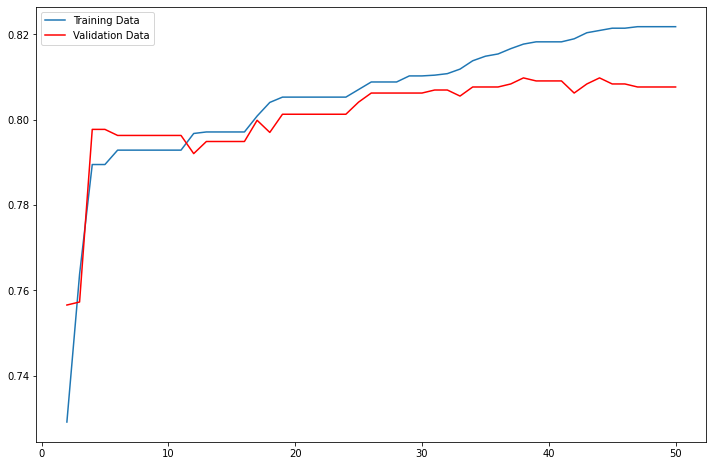

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(leaf_score['NoLeaves'], leaf_score['TrainScore'], label='Training Data')
plt.plot(leaf_score['NoLeaves'],leaf_score['ValidScore'], label = 'Validation Data', color = 'red')
plt.legend()
plt.show()

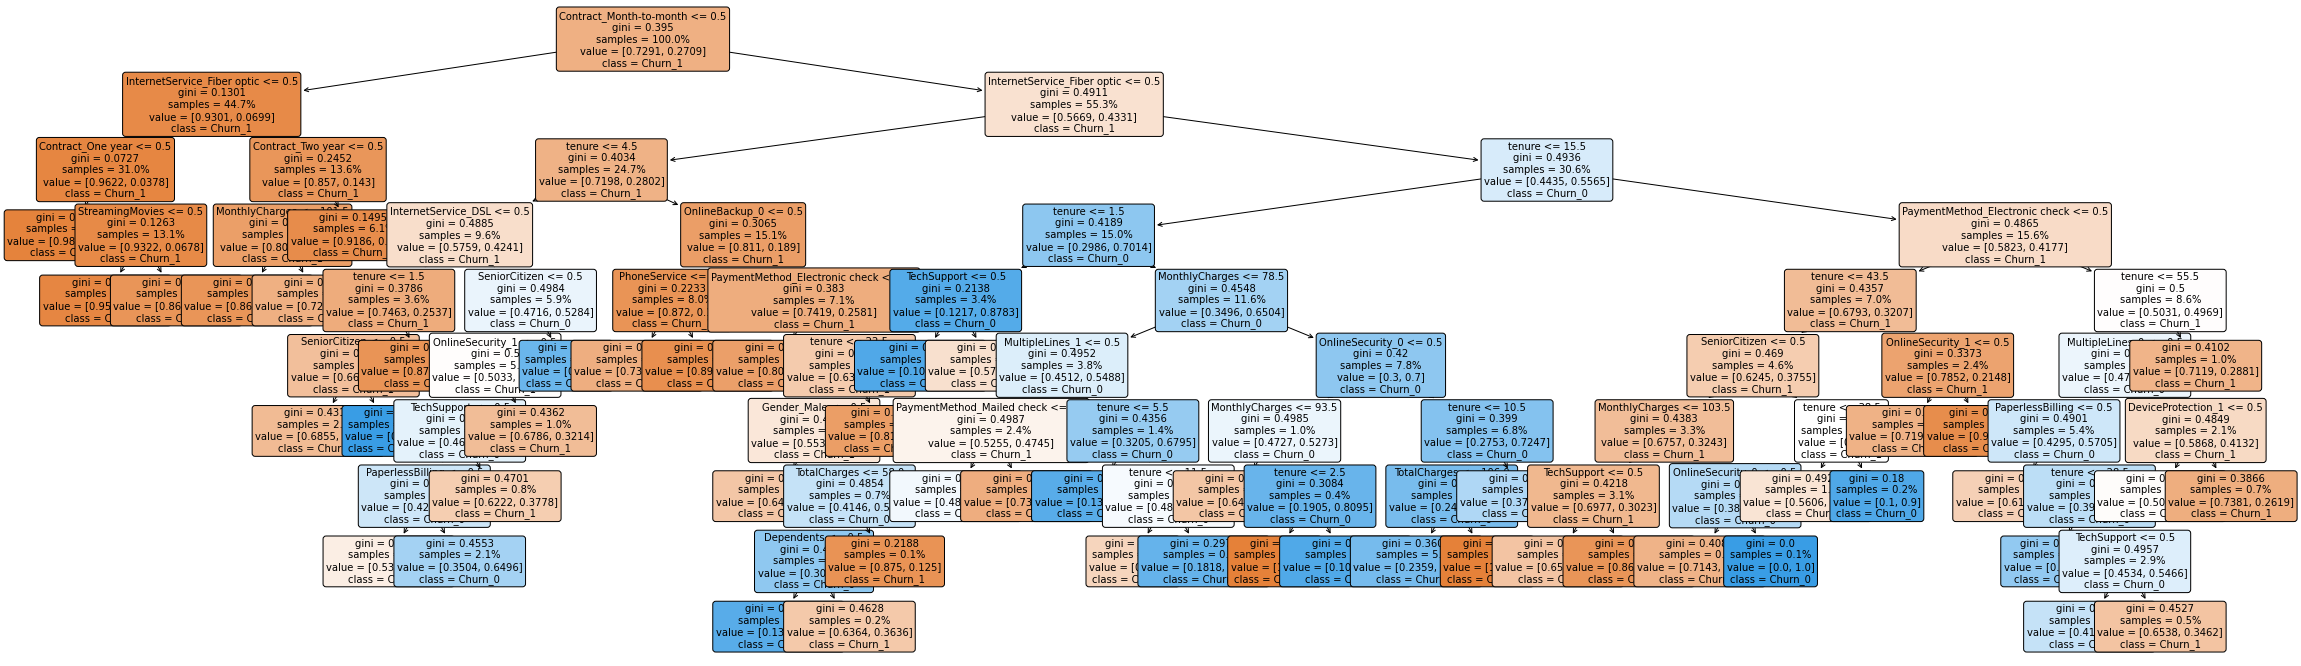

In [ ]:
plt.figure(figsize=(40,12))
dec_tree = plot_tree(decision_tree = tree_model, feature_names = X_valid.columns,
                     class_names = ["Churn_1","Churn_0"], filled = True, precision = 4, rounded = True, fontsize = 10, proportion = True)
plt.show()

In [ ]:
# Random Forest Classifier 
tree_model_2= RandomForestClassifier(max_depth=2, random_state = 0)
tree_model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#evaluate the model
confusion_matrix(Y_train, tree_model_2.predict(X_train))

array([[4108,    0],
       [1526,    0]])

In [ ]:
confusion_matrix(Y_valid, tree_model_2.predict(X_valid))

array([[1066,    0],
       [ 343,    0]])

In [ ]:
#random forest accuracy score y train
accuracy_score(Y_train, tree_model_2.predict(X_train))

0.729144479943202

In [ ]:
#random forest accuracy score y test/valid
accuracy_score(Y_valid, tree_model_2.predict(X_valid))

0.7565649396735273

In [ ]:
leaf_range = np.arange(2,51)
leaf_range

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
leaf_score=pd.DataFrame(columns = ['NoLeaves','TrainScore','ValidScore'])
leaf_score

,NoLeaves,TrainScore,ValidScore


In [ ]:
for i in leaf_range:
  tree_model=RandomForestClassifier(max_depth=i, random_state=0)
  tree_model.fit(X_train, Y_train)
  accTrain=accuracy_score(Y_train, tree_model.predict(X_train))
  accValid=accuracy_score(Y_valid, tree_model.predict(X_valid))
  leaf_score=leaf_score.append({'NoLeaves':i, 'TrainScore':accTrain,'ValidScore':accValid}, ignore_index= True)

In [ ]:
leaf_score

,NoLeaves,TrainScore,ValidScore
0,2.0,0.751864,0.779276
1,3.0,0.779198,0.786373
2,4.0,0.793042,0.792051
3,5.0,0.800674,0.796309
4,6.0,0.808129,0.794180
5,7.0,0.815939,0.790632
6,8.0,0.826589,0.797729
7,9.0,0.839368,0.799858
8,10.0,0.869365,0.799148
9,11.0,0.899894,0.797729


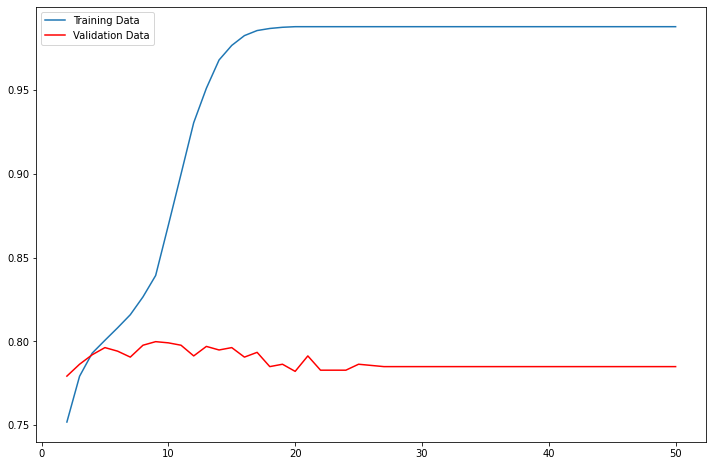

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(leaf_score['NoLeaves'], leaf_score['TrainScore'], label='Training Data')
plt.plot(leaf_score['NoLeaves'],leaf_score['ValidScore'], label = 'Validation Data', color = 'red')
plt.legend()
plt.show()

[Text(0.7154925859591477, 0.9814814814814815, 'InternetService_No <= 0.5\ngini = 0.401\nsamples = 3543\nvalue = [4068, 1566]'),
 Text(0.47829732891818777, 0.9444444444444444, 'PaymentMethod_Electronic check <= 0.5\ngini = 0.445\nsamples = 2815\nvalue = [2967, 1485]'),
 Text(0.29654692207844613, 0.9074074074074074, 'OnlineSecurity_1 <= 0.5\ngini = 0.341\nsamples = 1680\nvalue = [2068, 576]'),
 Text(0.1964243079468417, 0.8703703703703703, 'Partner <= 0.5\ngini = 0.438\nsamples = 910\nvalue = [971, 464]'),
 Text(0.12221732755837728, 0.8333333333333334, 'TechSupport <= 0.5\ngini = 0.477\nsamples = 484\nvalue = [472, 306]'),
 Text(0.08533640912514796, 0.7962962962962963, 'OnlineBackup_1 <= 0.5\ngini = 0.498\nsamples = 339\nvalue = [286, 252]'),
 Text(0.047246583449908536, 0.7592592592592593, 'MonthlyCharges <= 69.5\ngini = 0.498\nsamples = 242\nvalue = [183, 208]'),
 Text(0.022221026579145594, 0.7222222222222222, 'Gender_Male <= 0.5\ngini = 0.479\nsamples = 123\nvalue = [114, 75]'),
 Text(0

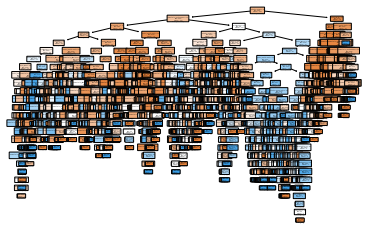

In [ ]:
from sklearn import tree
plot_tree(tree_model.estimators_[0],
          feature_names=X_train.columns,
          filled=True, impurity= True,
          rounded=True)

In [ ]:
# SVM
xTrain, xValid, yTrain, yValid = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
SVModel = SVC(kernel = 'linear', C=10, gamma = 'auto')
SVModel.fit(xTrain, yTrain)

SVC(C=10, gamma='auto', kernel='linear')

In [ ]:
confusion_matrix(yTrain, SVModel.predict(xTrain))

array([[3689,  424],
       [ 692,  829]])

In [ ]:
#accuracy score SVM for Y train
accuracy_score(yTrain, SVModel.predict(xTrain))

0.8019169329073482

In [ ]:
confusion_matrix(yValid, SVModel.predict(xValid))

array([[936, 125],
       [151, 197]])

In [ ]:
#accuracy score SVM for y test
accuracy_score(yValid, SVModel.predict(xValid))

0.8041163946061036

In [ ]:
krn = ['linear', 'poly','rbf','sigmoid']
rng_C = np.arange(1, 15, 5)
rng_deg = np.arange(2, 5)

In [ ]:
param = {'kernel' :krn,
         'C' :rng_C,
       'degree' :rng_deg}

In [ ]:
SVModel = SVC()
GridS = GridSearchCV(SVModel,param, cv=5)
GridS.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  6, 11]), 'degree': array([2, 3, 4]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
GridS.best_params_

{'C': 1, 'degree': 2, 'kernel': 'linear'}

In [ ]:
SVModel = SVC(kernel='linear', C=1, degree=2)
SVModel.fit(xTrain,yTrain)
accuracy_score(yValid, SVModel.predict(xValid))

0.8048261178140526

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.57      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



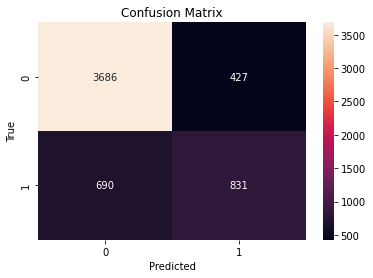

In [ ]:
y_pred_test = SVModel.predict(xValid)
matrix = confusion_matrix(yTrain, SVModel.predict(xTrain))
sns.heatmap(matrix, annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(yValid, y_pred_test))

In [ ]:
#KNN Redifining
x = data6.drop(['Churn'], axis=1)
y = data6['Churn']

In [ ]:
#print y
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
#print x
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,...,PaymentMethod_Mailed check,MultipleLines_0,MultipleLines_1,OnlineSecurity_0,OnlineSecurity_1,OnlineBackup_0,OnlineBackup_1,OnlineBackup_No internet service,DeviceProtection_0,DeviceProtection_1
0,0,1,0,1,0,0,0,0,1,29,...,0,1,0,1,0,0,1,0,1,0
1,0,0,0,34,1,0,0,0,0,56,...,1,1,0,0,1,1,0,0,0,1
2,0,0,0,2,1,0,0,0,1,53,...,1,1,0,0,1,0,1,0,1,0
3,0,0,0,45,0,1,0,0,0,42,...,0,1,0,0,1,1,0,0,0,1
4,0,0,0,2,1,0,0,0,1,70,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,1,84,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,72,1,0,1,1,1,103,...,0,0,1,1,0,0,1,0,0,1
7040,0,1,1,11,0,0,0,0,1,29,...,0,1,0,0,1,1,0,0,1,0
7041,1,1,0,4,1,0,0,0,1,74,...,1,0,1,1,0,1,0,0,1,0


In [ ]:
#KNN re-preprocessing to double-check everything
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [ ]:
#splitting
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
#using KNeighbors classifier to train and predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(xTrain,yTrain)
Pred_y = neigh.predict(xTest)
print("Accuracy of model at k = 4 is", metrics.accuracy_score(yTest, Pred_y))

Accuracy of model at k = 4 is 0.7665010645848119


Minimum error:- 0.2044002838892832 at K = 33


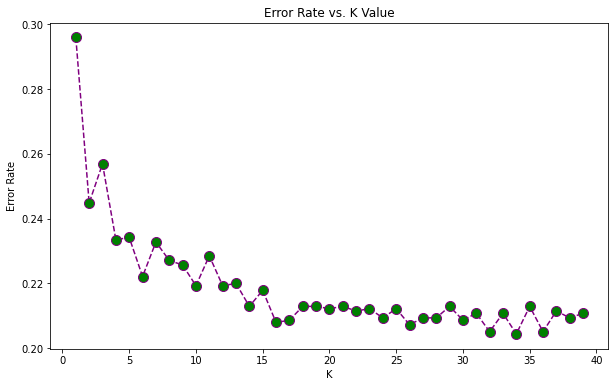

In [ ]:
#Error Rate
error_rate = []
for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xTrain, yTrain)
  pred_i = knn.predict(xTest)
  error_rate.append(np.mean(pred_i !=yTest))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum Accuracy:- 0.7955997161107168 at K = 33


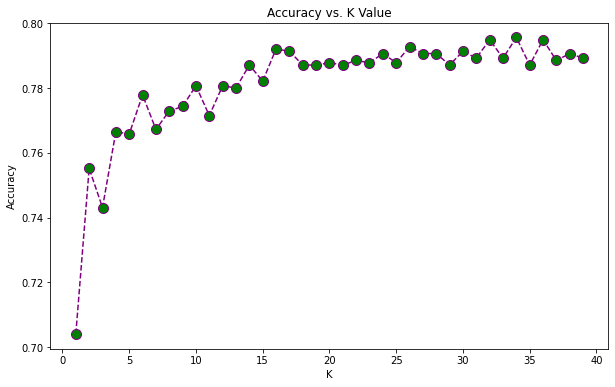

In [ ]:
#Accuracy and plotting
acc = []
#Will take some time
from sklearn import metrics
for i in range (1,40):
  neigh = KNeighborsClassifier(n_neighbors = i).fit(xTrain,yTrain)
  yhat = neigh.predict(xTest)
  acc.append(metrics.accuracy_score(yTest,yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum Accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
#Importing More
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [ ]:
#Setting up to find the best parameters
n_neighbors = np.arange(1,40)
grid_params = {'n_neighbors' : n_neighbors,
              'leaf_size': [30, 35],
              'algorithm' : ['ball_tree', 'kd_tree']}
gridSearch = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)
gridSearchresults = gridSearch.fit(xTrain, yTrain)

Fitting 3 folds for each of 156 candidates, totalling 468 fits


In [ ]:
#finding the best parameters
gridSearchresults.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 37}

In [ ]:
#making confusion matrix
Classifier = KNeighborsClassifier(n_neighbors=37, leaf_size=30, algorithm ='ball_tree')
Classifier.fit(xTrain,yTrain)
y_pred_train= Classifier.predict(xTrain)
y_pred_test = Classifier.predict(xTest)

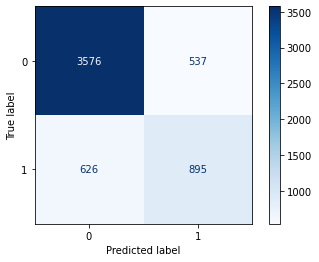

In [ ]:
#plotting train matrix
plot_confusion_matrix(Classifier,xTrain,yTrain, cmap= plt.cm.Blues)

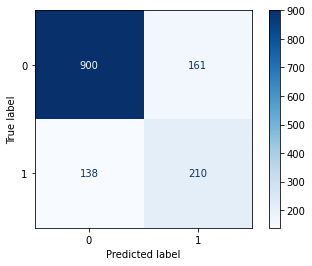

In [ ]:
#plotting test matrix
plot_confusion_matrix(Classifier, xTest, yTest, cmap = plt.cm.Blues)

In [ ]:
#classification report for test
from sklearn.metrics import classification_report
print(classification_report(yTest,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1061
           1       0.57      0.60      0.58       348

    accuracy                           0.79      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
#classification report for train
print(classification_report(yTrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4113
           1       0.62      0.59      0.61      1521

    accuracy                           0.79      5634
   macro avg       0.74      0.73      0.73      5634
weighted avg       0.79      0.79      0.79      5634

